# 2.4 综合案例实战 : 股票数据读取与K线图绘制

In [2]:
%matplotlib inline

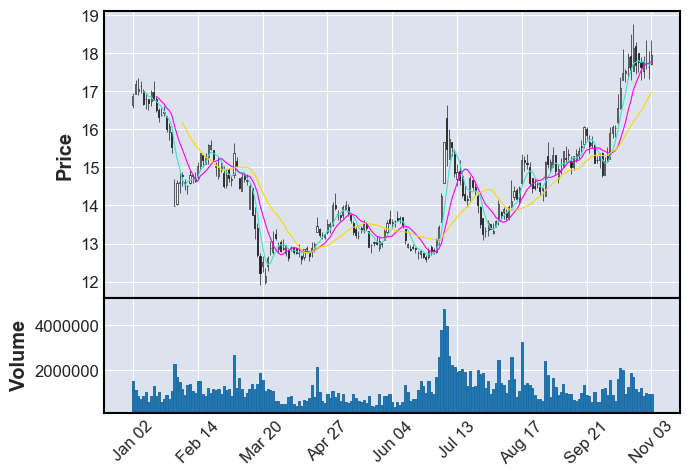

In [3]:
import tushare as ts
import mplfinance as mpf
from pylab import mpl
import pandas as pd

pro = ts.pro_api('9d674d000f7c730dd3108701a1a1c534bf51bfb03a0ff169a9d11848')  #
#https://tushare.pro/user/token
df = pro.daily(ts_code='000001.SZ', start_date='20200101', end_date='20201103')

#df.sort_values(by='trade_date',ascending=False)
#取所有行数据，后面取date列，open列等数据
data = df.loc[:, ['trade_date', 'open', 'close', 'high', 'low', 'vol']]
data = data.rename(columns={'trade_date': 'Date', 'open': 'Open', 'close': 'Close', 'high': 'High', 'low': 'Low', 'vol': 'Volume'})  #更换列名，为后面函数变量做准备
#设置date列为索引，覆盖原来索引,这个时候索引还是 object 类型，就是字符串类型。
data.set_index('Date', inplace=True)
#将object类型转化成 DateIndex 类型，pd.DatetimeIndex 是把某一列进行转换，同时把该列的数据设置为索引 index。
data.index = pd.DatetimeIndex(data.index)

#将时间顺序升序，符合时间序列
data = data.sort_index(ascending=True)

# pd.set_option()就是pycharm输出控制显示的设置，下面这几行代码其实没用上，暂时也留在这儿吧
pd.set_option('expand_frame_repr', False)#True就是可以换行显示。设置成False的时候不允许换行
pd.set_option('display.max_columns', None)# 显示所有列
#pd.set_option('display.max_rows', None)# 显示所有行
pd.set_option('colheader_justify', 'centre')# 显示居中


mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams["figure.figsize"] = [6.4, 4.8]
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

mpf.plot(data, type='candle', mav=(5, 10, 20), volume=True, show_nontrading=False)

**下面有的代码新版本废弃了，注意新版本用法**

## 2.4.1 初步尝试 - 股票数据读取与可视化

**1. 股票数据读取：Tushare库的安装与使用**

首先推荐通过PIP安装法来安装可以调用股价数据的Tushare库（Tushare库官方地址为：http://tushare.org/
以Windows系统为例，具体方法是：通过Win + R组合键调出运行框，输入cmd后回车，然后在弹出框中输入pip install tushare后按一下Enter回车键的方法来进行安装。如果在1.2.3节讲到的Jupyter Notebook编辑器中安装的话，只需要在代码框中输入如下代码然后运行该行代码框即可（注意是英文格式下的!）：
!pip install tushare

In [4]:
# 我们只需要通过如下2行代码便可获取到股票基本数据：
import tushare as ts
df = ts.get_k_data('000002', start='2009-01-01', end='2019-01-01')
df.head()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,date,open,close,high,low,volume,code
0,2009-01-05,5.086,5.178,5.178,5.008,936048.88,000002
1,2009-01-06,5.163,5.333,5.372,5.109,1216831.18,000002
2,2009-01-07,5.356,5.302,5.457,5.302,834829.31,000002
3,2009-01-08,5.217,5.333,5.410,5.163,837661.70,000002
4,2009-01-09,5.333,5.325,5.418,5.263,626815.66,000002


In [5]:
# 此时如果想要将股票数据获取到Excel文件中，则可以使用2.2.2节相关知识点，代码如下：
df.to_excel('股价数据.xlsx', index=False)

**2. 绘制股价走势图**

已经有了股价数据后，我们可以通过可视化的方式将其展示出来，这里我们首先利用2.2.1节的补充知识点中的set_index()函数将日期设置为行索引，这样方便等会直接用pandas库进行绘图，代码如下：

In [6]:
df.set_index('date', inplace=True)
df.head()

,open,close,high,low,volume,code
date,,,,,,
2009-01-05,5.086,5.178,5.178,5.008,936048.88,000002
2009-01-06,5.163,5.333,5.372,5.109,1216831.18,000002
2009-01-07,5.356,5.302,5.457,5.302,834829.31,000002
2009-01-08,5.217,5.333,5.410,5.163,837661.70,000002
2009-01-09,5.333,5.325,5.418,5.263,626815.66,000002


通过2.3.1节补充知识点中pandas绘图的相关知识点来进行图形绘制，代码如下。因为在pandas库中plot()函数默认绘制的是折线图，所以直接写plot()即可，不需要传入kind参数。此外在金融领域，通常用收盘价作为当天价格来绘制股价走势图，因此这里选择的是close这一列。

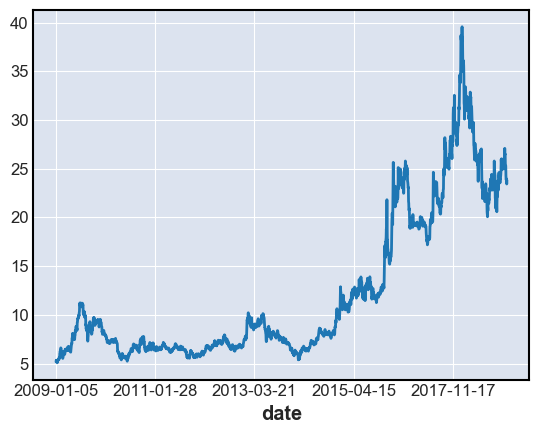

In [7]:
df['close'].plot()

如果想给图片加一个标题，在pandas库中使用可以在plot()可以在里面传入一个title参数，代码如下，注意因为标题是中文内容，所以要写2.3.2节最后讲到的两行代码防止中文乱码。

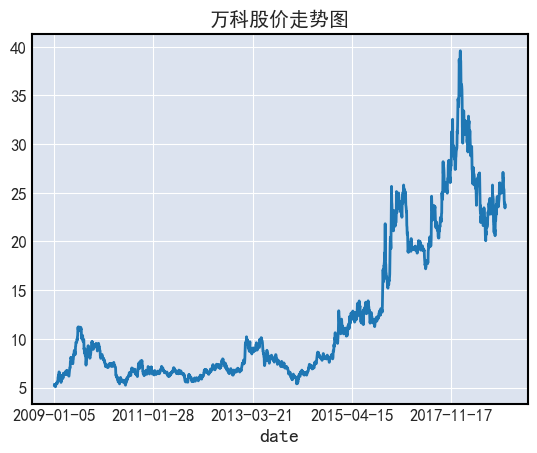

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
df['close'].plot(title='万科股价走势图')    

**补充知识点：直接使用Matplotlib库绘制图表**

上面使用的是pandas库中的plot()函数，pandas库其实是集成了Matplotlib库的一些功能，如果有的读者想直接用Matplotlib库进行股价走势画图，可以采用如下代码：

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\LYJZB\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\LYJZB\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\LYJZB\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\LYJZB\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

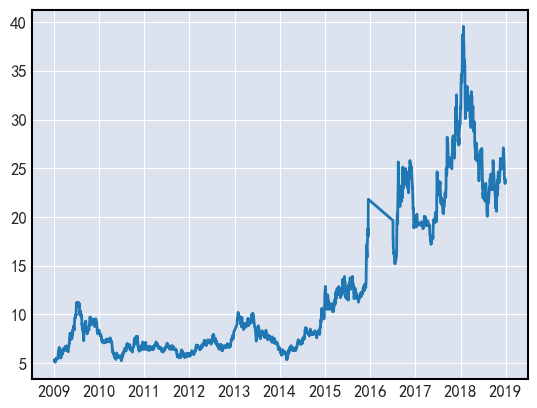

In [9]:
# 通过Tushare库获取股价数据
import tushare as ts
df = ts.get_k_data('000002', start='2009-01-01', end='2019-01-01')

# 要注意的细节：调整日期格式使得横坐标显示清晰
from datetime import datetime
df['date'] = df['date'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))

# 绘制折线图
import matplotlib.pyplot as plt
plt.plot(df['date'], df['close'])
plt.show()

## 2.4.2 进阶实战: 股票K线图绘制

**1. 股票K线图基础知识**

一个实际中的股票K线图如下图所示（这个是“贵州茅台”股票的日线级别的K线图）：
<div>align ="center"<img src=".\贵州茅台股票K线图.png" style ="zoom:70%"/></div>

没有接触过股票的读者可能会被里面的各个柱状图和折线图搞得一头雾水，而这些图形其实都是通过一些很基础的数据绘制而成，这一节便主要来科普下股票K线图的基本知识。
这些柱状图，通常称之为“K线图”，是由股票的四个价格来绘制的：开盘价（当天上午9点半开始交易时的价格）、收盘价（当天下午3点结束交易时的价格）、最高价（当天股价波动中的最高价）、最低价（当天股价波动中的最低价），简称“高、开、低、收”四个价格。
如下图所示，根据这四个价格便可以绘制出红色和绿色的K线图，因为形似蜡烛，因此也常被称之为蜡烛图。K线图分为两种，如果当天的收盘价高于开盘价，也就是说当天的价格上涨，则称之为阳线，通常绘制成红色；反之如果当天的收盘价低于开盘价，也就是说当天的价格下跌，则称之为阴线，通常绘制成绿色。补充说一句，在美国，反而是红色代表跌，绿色代表涨。

<div> align= "center<img src=".\阴阳线图.png" style ="zoom:50%"/></div>
        
这里再解释下均线图，也就是那些折线图的绘制原理。均线分为5日均线（通常称之为MA5）、10日均线（通常称之为MA10）、20日均线（通常称之为MA20）等，其原理就是将股价的收盘价求均值，例如5日均线就是最近连续5个交易日收盘价之和的平均值，具体的计算公式如下，其中Close1为当天的收盘价，Close2为前一天的收盘价，其余依次类推。
MA5 = (Close1 + Close2 + Close3 + Close4 + Close5)/5

把每个5日均线的值连成一条平滑的曲线就是5日均线图了，同理10日均线图和20日均线图也是类似的原理，这些均线图也就是我们在这一小节最开始看到图中的那些折线图。
了解了股票K线图的基本知识后，下面我们就来进行K线图的绘制工作。

**2.绘制股票K线图**

**(1) 安装绘制K线图的mplfinance库**

首先需要安装绘制K线图的相关库：mpl_finance库，其安装办法稍微麻烦一点，推荐通过PIP安装法安装，以Windows系统为例，具体方法是：通过Win + R组合键调出运行框，输入cmd后回车，然后在弹出框中输入如下内容，按一下Enter回车键进行安装：

pip install mplfinance

如果是在在1.2.3节讲到的Jupyter Notebook中安装，则在pip前面加一个英文的感叹号“!”然后运行该代码块即可。

In [10]:
# 通过如下代码，可以在Jupyter Notebook中安装。（需取消注释）
# !pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

**(2) 引入绘图相关库**

In [11]:
# 首先引入一些绘图需要用到的库，代码如下：
import tushare as ts
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
sns.set()

第一个引入2.4.1节讲到的Tushare库，第二引入2.3.1节讲到的Matplotlib库在；第三个引入刚刚安装的mpl_finance库；第四个seaborn库是一个图表美化库，通过sns.set()即可激活，如果是通过1.2.1节Anaconda安装的Python，那么就自带该库了，无需额外安装。上面的代码直接拿去运行即可。

**(3) 通过Tushare库获取股票基本数据**

In [12]:
# 通过Tushare库获取股票代码为“000002”的股票“万科A”在2019-06-01至2019-09-30的股价数据，代码如下：
df = ts.get_k_data('000002','2019-06-01', '2019-09-30')
df.head()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,date,open,close,high,low,volume,code
99,2019-06-03,26.81,26.44,27.02,26.28,317567.0,000002
100,2019-06-04,26.47,26.30,26.54,26.25,203260.0,000002
101,2019-06-05,26.64,27.03,27.28,26.63,576164.0,000002
102,2019-06-06,27.01,27.12,27.29,26.92,333792.0,000002
103,2019-06-10,27.29,27.81,28.05,27.17,527547.0,000002


**(4) 日期格式调整及表格转换**

因为绘制K线图的candlestick_ochl()函数只能接收特定格式的日期格式，以及数组格式的内容，所以我们需要将原来文本类型的日期格式调整一下，代码如下：


In [13]:
# 导入日期格式调整涉及的两个库
from matplotlib.pylab import date2num
import datetime

# 对tushare获取到的日期数据转换成candlestick_ohlc()函数可读取的数字格式
def date_to_num(dates):
    num_time = []
    for date in dates:
        date_time = datetime.datetime.strptime(date,'%Y-%m-%d')
        num_date = date2num(date_time)
        num_time.append(num_date)
    return num_time

# 将DataFrame转换为二维数组，并利用date_to_num()函数转换日期
df_arr = df.values  # 将DataFrame格式的数据，转换为array二维数组
df_arr[:,0] = date_to_num(df_arr[:,0])  # 将原来日期格式的日期换成数字格式

df_arr[0:5] # 查看此时的df_arr的前5项

array([[737213.0, 26.81, 26.44, 27.02, 26.28, 317567.0, '000002'],
       [737214.0, 26.47, 26.3, 26.54, 26.25, 203260.0, '000002'],
       [737215.0, 26.64, 27.03, 27.28, 26.63, 576164.0, '000002'],
       [737216.0, 27.01, 27.12, 27.29, 26.92, 333792.0, '000002'],
       [737220.0, 27.29, 27.81, 28.05, 27.17, 527547.0, '000002']],
      dtype=object)

**(5) 绘制K线图**

转换好数据格式后，K线图的绘制就比较简单了，通过candlestick_ochl()函数便能够轻松的绘制K线图了，代码如下：

In [14]:
kdata = df.rename(columns={'date':'Date','open':'Open','close':'Close','high':'High','low':'Low','volume':'Volume','code':'Code'})

In [15]:
kdata = kdata.set_index('Date')

In [16]:
kdata.index = pd.DatetimeIndex(kdata.index)

In [17]:
#新版本废弃
#fig, ax = plt.subplots(figsize=(15,6))
#mpf.candlestick_ochl(ax, df_arr, width=0.6, colorup='r', colordown='g', alpha=1.0)
#plt.grid(True)  # 绘制网格
#ax.xaxis_date()  # 设置x轴的刻度为日期

**candlestick_ochl()函数的参数：**

    ax：绘图Axes的实例，也就是画布中的子图；

    df_arr：股价历史数据；

    width：图像中红绿矩形的宽度；

    colorup：收盘价格大于开盘价格时矩形的颜色；

    colordown：收盘价格低于开盘价格时矩形的颜色；

    alpha：矩形的颜色的透明度；

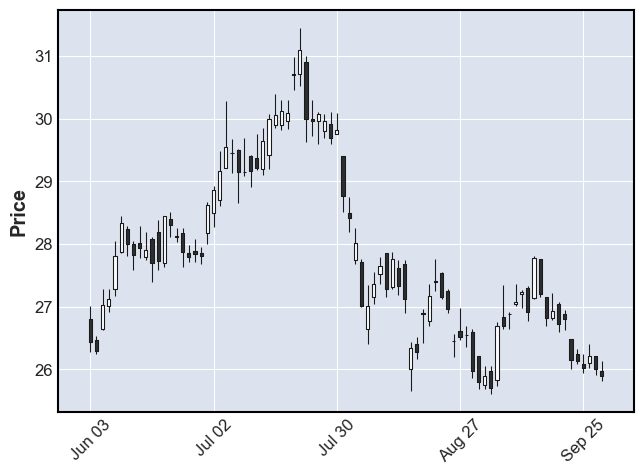

In [20]:
mpf.plot(kdata, type='candle', show_nontrading=False)

**(6) 绘制K线图及均线图**

有了K线图之后，我们再来补上均线图，这里我们主要补上5日均线和10日均线图，首先我们通过如下代码构造5日均线和10日均线数据：

In [21]:
df['MA5'] = df['close'].rolling(5).mean()
df['MA10'] = df['close'].rolling(10).mean()

df.head(15)  # 查看此时的前15行

,date,open,close,high,low,volume,code,MA5,MA10
99,2019-06-03,26.81,26.44,27.02,26.28,317567.0,000002,NaN,NaN
100,2019-06-04,26.47,26.30,26.54,26.25,203260.0,000002,NaN,NaN
101,2019-06-05,26.64,27.03,27.28,26.63,576164.0,000002,NaN,NaN
102,2019-06-06,27.01,27.12,27.29,26.92,333792.0,000002,NaN,NaN
103,2019-06-10,27.29,27.81,28.05,27.17,527547.0,000002,26.940,NaN
104,2019-06-11,27.87,28.33,28.45,27.85,449630.0,000002,27.318,NaN
105,2019-06-12,28.24,28.00,28.29,27.81,269372.0,000002,27.658,NaN
106,2019-06-13,28.00,27.83,28.05,27.58,250431.0,000002,27.818,NaN
107,2019-06-14,28.01,27.93,28.29,27.78,311417.0,000002,27.980,NaN
108,2019-06-17,27.80,27.91,28.20,27.75,171672.0,000002,28.000,27.470


In [25]:
data = data.sort_index(ascending=True)

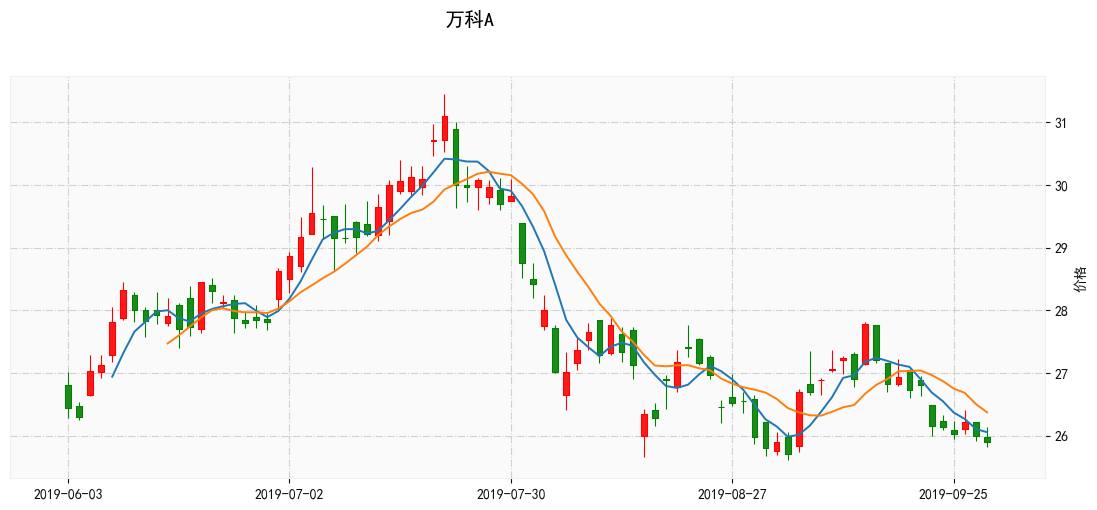

In [53]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 

my_color = mpf.make_marketcolors(up='red', down='green', edge='i', wick='i', volume='in')
# 解决mplfinance绘制输出中文乱码
my_style = mpf.make_mpf_style(base_mpf_style='yahoo',marketcolors=my_color, gridaxis='both', gridstyle='-.', y_on_right=True,rc={'font.family': 'SimHei'})
mpf.plot(kdata, type='candle',style = my_style,title='万科A',ylabel='价格',xrotation=0,datetime_format='%Y-%m-%d',mav=(5, 10), show_nontrading=False,figratio=(15, 6),figscale=1)
# 绘制5日均线,10日均线


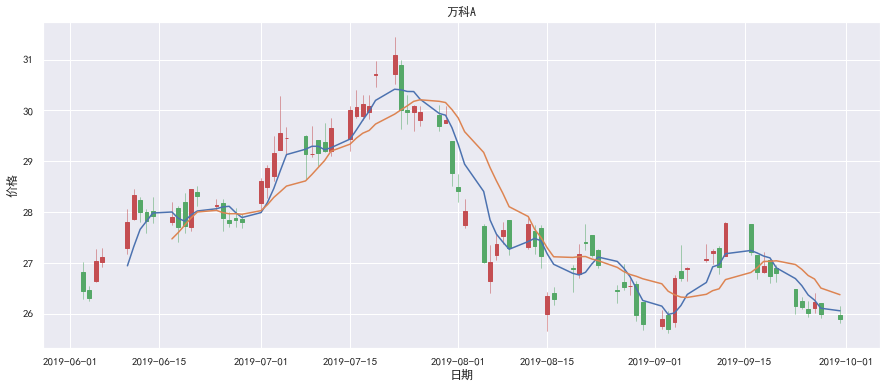

In [13]:
# 有了5日均线和10日均线数据后，就可以将其绘制在图形中了，代码如下：
#plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签

#fig, ax = plt.subplots(figsize=(15,6))

#mpf.candlestick_ochl(ax, df_arr, width=0.6, colorup='r', colordown='g', alpha=1.0) 
#plt.plot(df_arr[:,0], df['MA5'])  # 绘制5日均线
#plt.plot(df_arr[:,0], df['MA10'])  # 绘制10日均线

#plt.grid(True)  # 绘制网格

#plt.title('万科A')  # 设置标题
#plt.xlabel('日期')  # 设置X轴图例
#plt.ylabel('价格')  # 设置Y轴图例

#ax.xaxis_date () # 设置x轴的刻度为日期

**(7) 绘制股票K线图、均线图、成交量柱状图**

在现实中，和股票K线图、均线图一同出现的还有每日成交量的的柱状图，我们利用2.3.2节绘制多图的知识点，即可通过如下代码在一张画布中绘制两个子图，包含K线图、均线图、成交量柱状图：

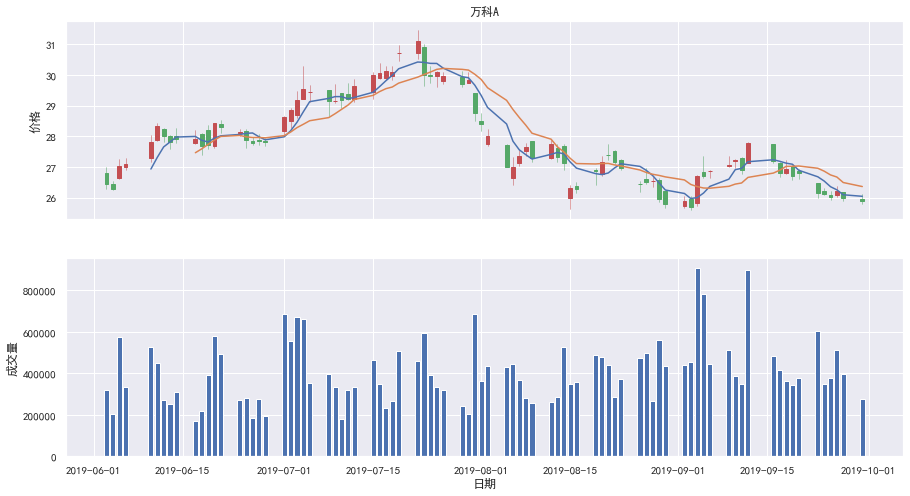

In [14]:
#fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15,8))
#ax1, ax2 = axes.flatten()

# 绘制第一张子图：K线图和均线图
#mpf.candlestick_ochl(ax1, df_arr, width=0.6, colorup = 'r', colordown = 'g', alpha=1.0)

#ax1.plot(df_arr[:,0], df['MA5'])  # 绘制5日均线
#ax1.plot(df_arr[:,0], df['MA10'])  # 绘制10日均线

#ax1.set_title('万科A')  # 设置子图标题
#ax1.set_ylabel('价格')  # 设置子图Y轴标签
#ax1.grid(True)
#ax1.xaxis_date()

# 绘制第二张子图：成交量图
#ax2.bar(df_arr[:,0], df_arr[:,5])  # 绘制成交量柱状图
#ax2.set_xlabel('日期')  # 设置子图X轴标签
#ax2.set_ylabel('成交量')  # 设置子图Y轴标签
#ax2.grid(True)
#ax2.xaxis_date()

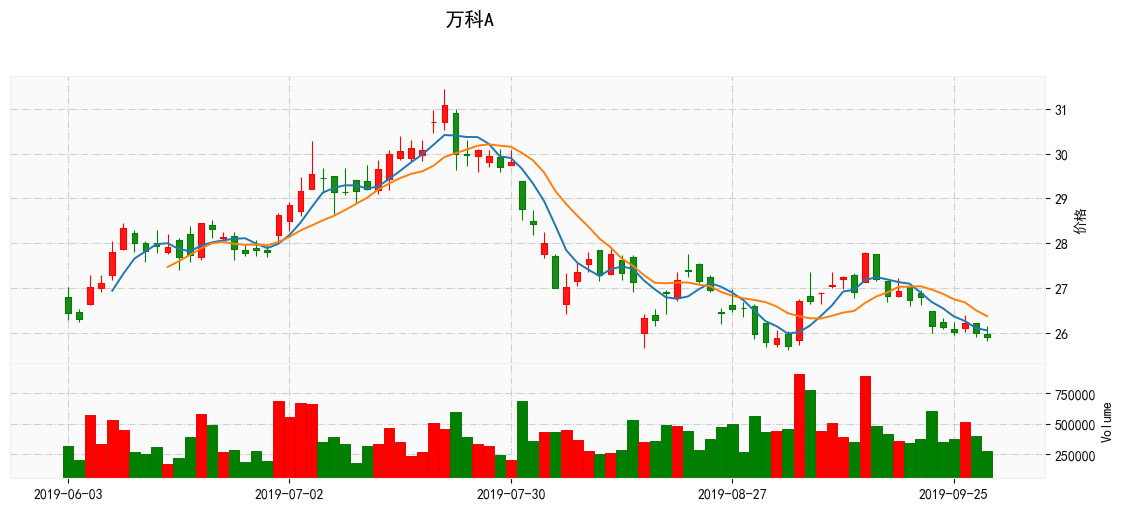

In [57]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 

my_color = mpf.make_marketcolors(up='red', down='green', edge='i', wick='i', volume='in')
# 解决mplfinance绘制输出中文乱码
my_style = mpf.make_mpf_style(base_mpf_style='yahoo',marketcolors=my_color, gridaxis='both', gridstyle='-.', y_on_right=True,rc={'font.family': 'SimHei'})
mpf.plot(kdata, type='candle',style = my_style,title='万科A',ylabel='价格',xrotation=0,datetime_format='%Y-%m-%d',mav=(5, 10), volume=True,show_nontrading=False,figratio=(15, 6),figscale=1)
# 绘制5日均线,10日均线

其中第1-2行代码利用2.3.2节绘制多图相关知识点先构造一个画布和两个子图，这里同时设置sharex参数为True，这样两张子图就可以共用一个坐标轴了；第4-13行绘制第一张子图，其中在子图中设置标题或者坐标轴标题得使用set_title()、set_ylabel()、set_xlabel()这样的函数；第15-20行绘制第二张子图：成交量图，其中df_arr[:,0]表示二维数组的第1列，也即日期那列，df_arr[:,5]表示二维数组的第6列，也即成交量那列数据，然后通过2.3.1节讲过的bar()函数绘制成柱状图。

我们可以和新浪财经网上的实际图像对比一下，如下图所示，发现通过Python绘制的K线图相关图片和网上的图片基本一致。
![图片解释](https://uploader.shimo.im/f/BhOBA3Zs73Yy74lA.png!thumbnail)

至此，数据分析的相关3大武器库已经给大家讲解完毕了，其实关于这三个库还有很多可以挖掘的知识点，由于篇幅有限，这里就不再赘述。这一章内容相对较多，读者朋友可以将这一章当作一个工具章，有需要的时候再返回看看需要用到的知识点。